The value of f is approximately: 0.021776504405312997
['-2.0000', '-1.8239', '-1.6990', '-1.5229', '-1.3979', '-1.3010', '-1.2218', '-1.1549', '-1.0969', '-1.0458']
[-2.         -1.82390874 -1.69897    -1.52287875 -1.39794001 -1.30103
 -1.22184875 -1.15490196 -1.09691001 -1.04575749]


C:\Users\admin\AppData\Local\Temp\ipykernel_6348\2289358955.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(map(lambda x: "10^(%s)"%int(x),x_t)))
C:\Users\admin\AppData\Local\Temp\ipykernel_6348\2289358955.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(lambda x : "10^(%s)"%int(x),x_ticks) ))


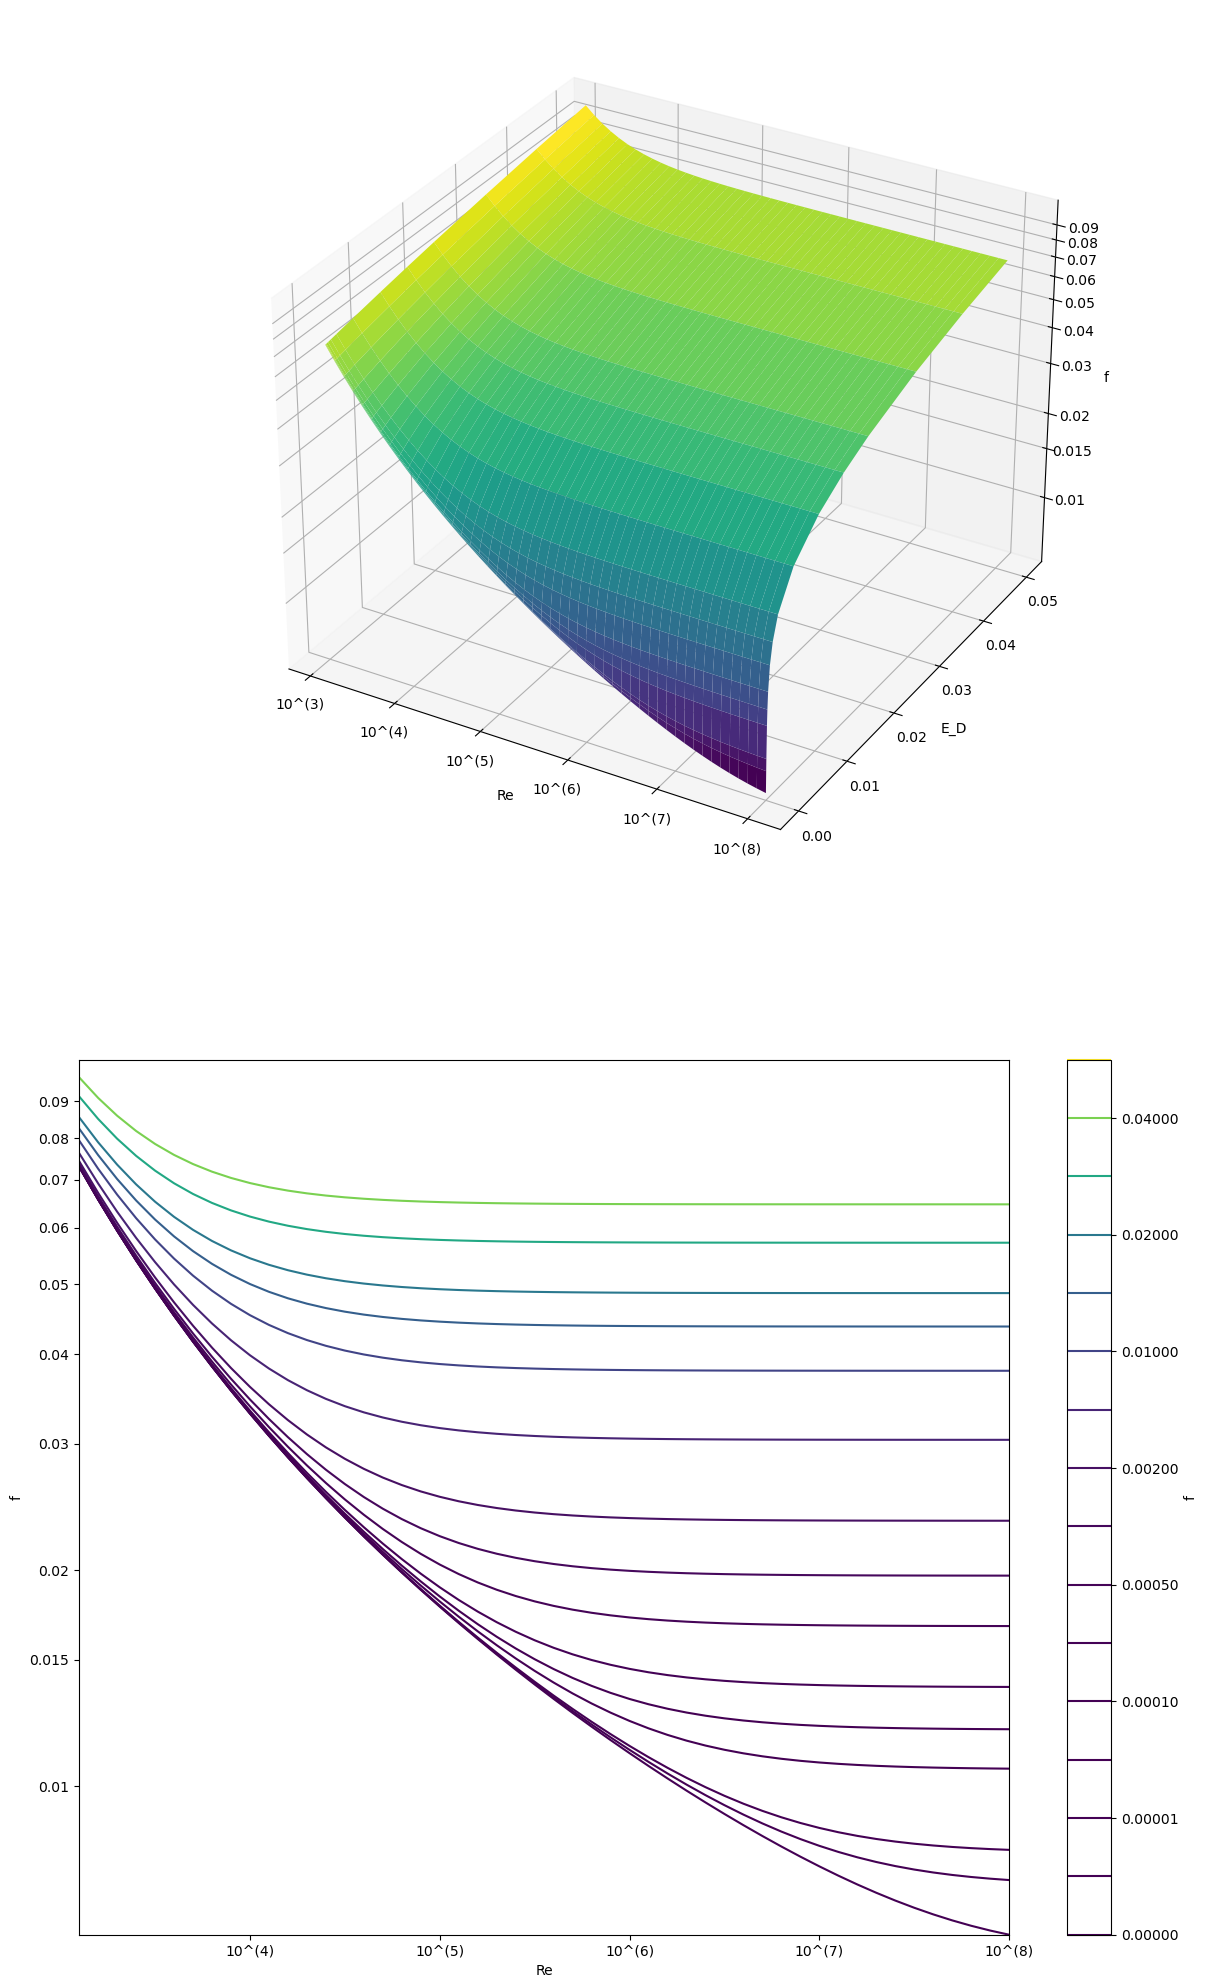

In [178]:
import math
import matplotlib.pyplot as plt
from matplotlib import projections
from mpl_toolkits.mplot3d import Axes3D
import numpy as  np

def calculate_f(Re, E_D):
    # 초기 추정값 설정
    f = 0.02
    # 반복적인 알고리즘 적용
    for _ in range(1000):  # 반복 횟수를 조절할 수 있음
        if ( _%2 == 1 ):
            new_f = f
        else:
            new_f = (-2 * math.log10((1/3.7) * (E_D) + 2.51 / (Re * math.sqrt(f))))**-2
        if abs(new_f - f) < 1e-10:  # 정확도를 설정할 수 있음
            break
        f = new_f
    
    return f

## 예시: Re = 50000, E_D = 0.0002 일 때 f 구하기
Re = 50000
E_D = 0.0002
f_result = calculate_f(Re, E_D)
print(f"The value of f is approximately: {f_result}")
 
def log_range(start_log, last_log, density):
    a = 10**(np.linspace(start_log, last_log, (last_log-start_log)*density+1))
    return a
Re_range = log_range(3,8,10)[1:]
rough_range = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05]
Re,rough = np.meshgrid(Re_range, rough_range)
# Initialize an empty array to store f values
f_values = []

# Iterate over Re and rough values
for i in range(len(rough_range)):
    row = []
    rough_val = rough_range[i]
    for j in range(len(Re_range)):
        Re_val = Re_range[j]
        f_val = calculate_f(Re_val, rough_val)
        row.append(f_val)
    f_values.append(row)
# Convert f_values to a NumPy array
f_values = np.array(f_values)

# Create a 3D mesh plot
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(211, projection='3d')
# Plot the surface
ax.plot_surface(np.log10(Re),rough, np.log10(f_values), cmap='viridis')
# Add labels
ax.set_xlabel('Re')
ax.set_ylabel('E_D')
ax.set_zlabel('f')
fr_range = [0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09]
ax.set_zticks(np.log10(fr_range))
ax.set_zticklabels(fr_range)
# ax.set_zticks(yticks)
x_t = ax.get_xticks()
ax.set_xticklabels(list(map(lambda x: "10^(%s)"%int(x),x_t)))
# Create a contour plot
ax2 = fig.add_subplot(212)
contour = ax2.contour(np.log10(Re), np.log10(f_values),rough, levels = rough_range,cmap='viridis')
# Add labels
yticks = np.log10(fr_range)
y_labels = [f'{tick:.4f}' for tick in yticks]
print(y_labels)
print(yticks)
ax2.set_yticks(yticks)
ax2.set_yticklabels(list(map(lambda x: round(10**float(x),4),y_labels)))
x_ticks = ax2.get_xticks()
ax2.set_xticklabels(list(map(lambda x : "10^(%s)"%int(x),x_ticks) ))
ax2.set_xlabel('Re')
ax2.set_ylabel('f')
# ax.set_xscale('log')
# Add a colorbar for the contour plot
plt.colorbar(contour, ax=ax2, label='f')
# Show the plot
plt.show()
# Show the plot
plt.show()